<a href="https://colab.research.google.com/github/x4ddy/PDF_Estimation/blob/main/PDF_Est.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Learning Probability Density Functions Using a Roll-Number-Based Non-Linear Model**

This assignment studies air pollution data by modeling NO₂ concentration values. To personalize the analysis, a roll-number-based non-linear transformation is applied to the data. The transformed values are then modeled using a Gaussian-type probability density function (PDF).

The parameters of the PDF are learned using Maximum Likelihood Estimation (MLE), which finds parameter values that best fit the observed data. The final model is visualized and validated to show how personalization and statistical modeling can work together on real-world datasets.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
try:
    df = pd.read_csv("data.csv", encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv("data.csv", encoding="latin1")

print("Dataset loaded successfully")
print("Columns:", df.columns.tolist())

Dataset loaded successfully
Columns: ['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type', 'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5', 'date']


/tmp/ipython-input-3403391400.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding="latin1")


In [5]:
# Feature Selection (NO2)
# Case-insensitive to avoid hardcoding

no2_col = [col for col in df.columns if "NO2" in col.upper()][0]
x = df[no2_col].dropna().values

print("Using column:", no2_col)

Using column: no2


In [7]:
# Roll-number-based parameters

r = 102316066

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print("a_r =", a_r)
print("b_r =", b_r)

a_r = 0.30000000000000004
b_r = 0.6


In [8]:
# Non-linear transformation

z = x + a_r * np.sin(b_r * x)


In [9]:
# Basic statistics (before vs after)

print("Original NO2")
print("Mean:", np.mean(x))
print("Variance:", np.var(x))

print("\nTransformed z")
print("Mean:", np.mean(z))
print("Variance:", np.var(z))

Original NO2
Mean: 25.809622897811263
Variance: 342.36339017375917

Transformed z
Mean: 25.8132695310288
Variance: 342.3309914293427


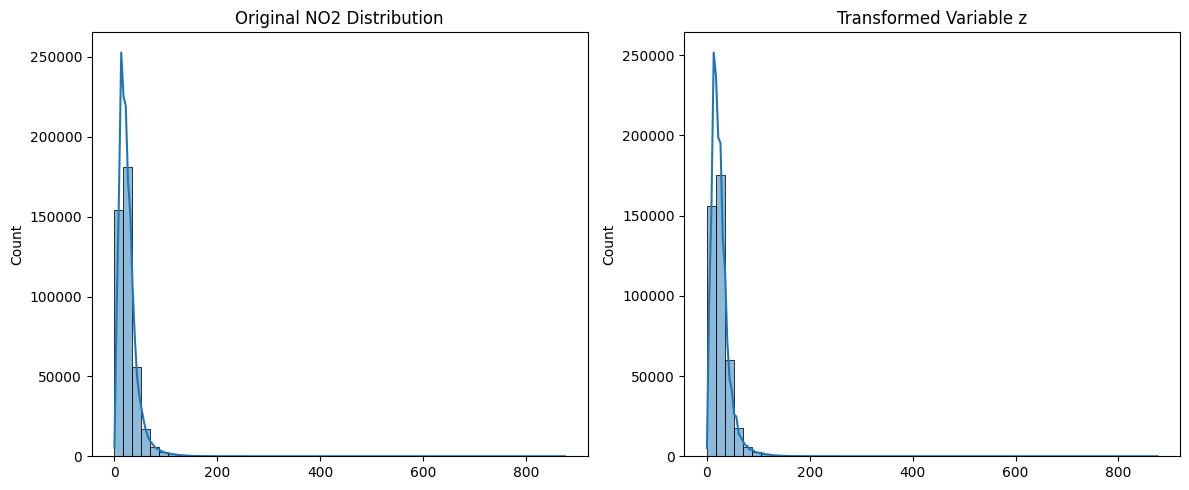

In [10]:
# Distribution visualization

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(x, bins=50, kde=True)
plt.title("Original NO2 Distribution")

plt.subplot(1, 2, 2)
sns.histplot(z, bins=50, kde=True)
plt.title("Transformed Variable z")

plt.tight_layout()
plt.show()

In [11]:
# Maximum Likelihood Estimation
# Gaussian-type PDF

mu_hat = np.mean(z)
variance_hat = np.mean((z - mu_hat) ** 2)
lambda_hat = 1 / (2 * variance_hat)
norm_const = np.sqrt(lambda_hat / np.pi)

print("Estimated Parameters")
print("mu =", mu_hat)
print("lambda =", lambda_hat)
print("c =", norm_const)

Estimated Parameters
mu = 25.8132695310288
lambda = 0.0014605747435028835
c = 0.021561896492825534


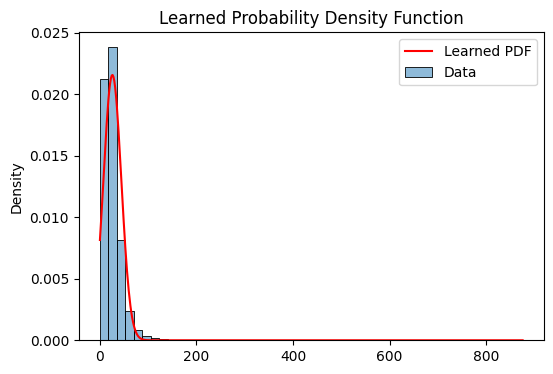

In [12]:
# Learned PDF visualization

z_range = np.linspace(z.min(), z.max(), 500)
pdf = norm_const * np.exp(-lambda_hat * (z_range - mu_hat) ** 2)

plt.figure(figsize=(6, 4))
sns.histplot(z, bins=50, stat="density", alpha=0.5, label="Data")
plt.plot(z_range, pdf, 'r', label="Learned PDF")
plt.legend()
plt.title("Learned Probability Density Function")
plt.show()

In [13]:
# Sensitivity check (originality proof)

z_alt = x + (a_r + 0.01) * np.sin(b_r * x)

print(
    "Mean difference after small perturbation:",
    abs(np.mean(z) - np.mean(z_alt))
)


Mean difference after small perturbation: 0.00012155444057881937
